# Building and training a mutli-layer network with Keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
%matplotlib inline

## Classifying Iris versicolor

Let us know try a slightly different problem: identifying the species *versicolor* instead of *setosa*.

This is a more challenging problem, because the species *versicolor* is very close to the related species *virginica*, as shown on the data below.

In [3]:
# Load data
df = pd.read_csv('./data/versicolor/train.csv')
X = df[['petal length (cm)', 'petal width (cm)']].values
y = df['versicolor'].values

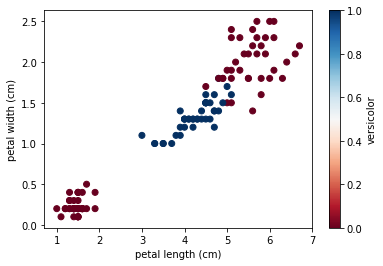

In [4]:
def plot_keras_model( model=None ):
    "Plot the Keras model, along with data"
    plt.clf()
    # Calculate the probability on a mesh
    if model is not None:
        petal_width_mesh, petal_length_mesh = \
            np.meshgrid( np.linspace(0,3,100), np.linspace(0,8,100) )
        petal_width_mesh = petal_width_mesh.flatten()
        petal_length_mesh = petal_length_mesh.flatten()
        p = model.predict( np.stack( (petal_length_mesh, petal_width_mesh), axis=1 ) )
        p = p.reshape((100,100))
        # Plot the probability on the mesh
        plt.imshow( p.T, extent=[0,8,0,3], origin='lower', 
               vmin=0, vmax=1, cmap='RdBu', aspect='auto', alpha=0.7 )
    # Plot the data points
    plt.scatter( df['petal length (cm)'], df['petal width (cm)'], c=df['versicolor'], cmap='RdBu')
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    cb = plt.colorbar()
    cb.set_label('versicolor')
plot_keras_model()

## Single layer network

Let us see how a single-layer neural network performs in this case. Here are building exactly the same kind of network as we did in the previous notebook. 

In [6]:
# Build the model
single_layer_model = Sequential()
single_layer_model.add( Dense( output_dim=1, input_dim=2 ) )
single_layer_model.add( Activation( 'sigmoid' ) )

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, input_dim=2)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# Prepare the model for training
single_layer_model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [8]:
# Train the network
single_layer_model.fit( X, y, batch_size=16, epochs=1000, verbose=0 )

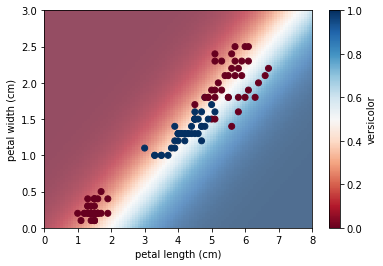

In [9]:
plot_keras_model( model=single_layer_model )

The network is unable to make the correct prediction, even after 1000 epochs of training. 

This because, as we saw when tuning the weights by hand, a single-layer network is only capable of producing a single linear boundary between two areas of the plane. For a more complicated model, we need several layers.

# Two layer network

A two layer network looks like this:

![Two-layer network](./images/Two_layer.png)

where the number of units in the intermediate layer (4 here) is a parameter that the user needs to choose.

In [10]:
# Build the model: pick 8 units in the intermediate layer
two_layer_model = Sequential()
two_layer_model.add( Dense( input_dim=2, units=8 ) )
two_layer_model.add( Activation( 'sigmoid' ) )
two_layer_model.add( Dense( input_dim=8, units=1 ) )
two_layer_model.add( Activation( 'sigmoid' ) )

In [11]:
# Compile the model
two_layer_model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [12]:
# Train it
two_layer_model.fit( X, y, batch_size=16, epochs=1000, verbose=0 )

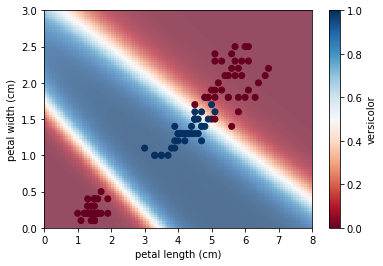

In [13]:
plot_keras_model( model=two_layer_model )

## A few more remarks on Keras and neural networks

Keras allows to build and train a number of neural network architectures:
- fully-connected networks
- convolutional networks
- recurrent networks

The corresponding code with the Keras interface is much less verbose than directly with the Tensorflow interfact (but also less flexible).

Keras still requires the user to make many educated guesses:
- Structure of the network (architecture, number of layers, number of nodes in each layers, activation functions)
- Training parameters (loss function, optimizer and learning rate, batch size, number of epochs)